In [1]:
import os
import sys
sys.path.insert(0, '/home/kevinteng/Desktop/DE_Project')
import time
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from skimage.external import tifffile as sktiff
import scipy.io

In [6]:
# load .mat file 
mat_list = []
sums = 0 #load top 3 because the a bundle of a series consisted of 3 .mat files

for i in sorted(os.listdir("/home/kevinteng/Desktop/mat/Ori_Lin/")):
    mat_path = os.path.join("/home/kevinteng/Desktop/mat/Ori_Lin/" + i)
    mat = np.load(mat_path)
    
    mat_list.append(mat)
    print(mat.shape)
    
    sums+=1 
    
    if sums == 3:
        break

(202, 201)
(202, 201, 16)
(605, 16)


# Mean ROI 

Shape: (202, 201)


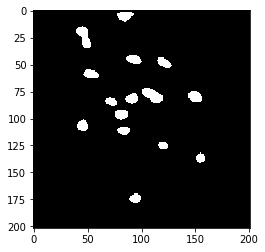

In [7]:
#shape (202, 201)
mean_roi = mat_list[0]
mean_roi = np.asarray(mean_roi)
print("Shape:", mean_roi.shape)

plt.imshow(mean_roi, cmap = 'gray')
plt.show()

# Mean individual ROI

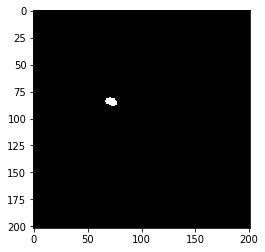

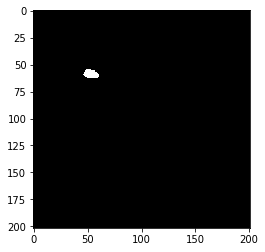

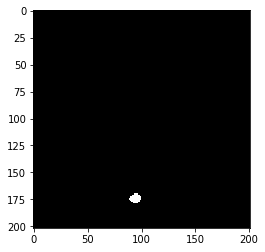

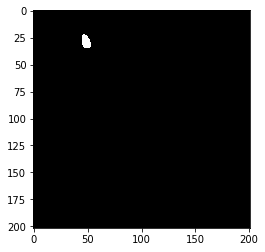

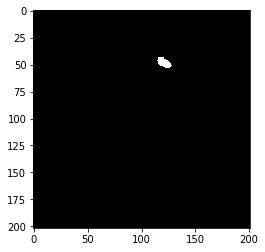

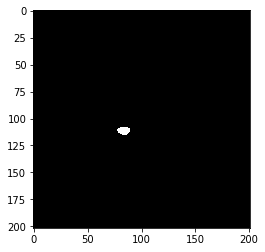

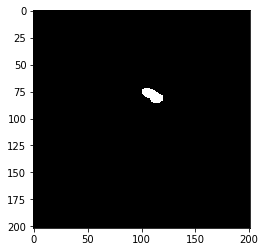

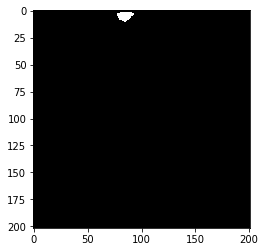

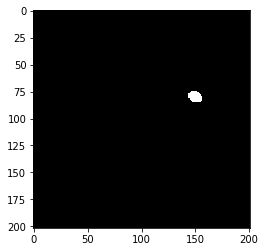

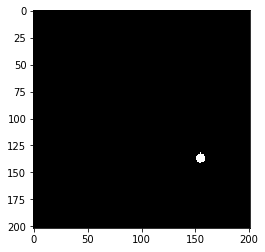

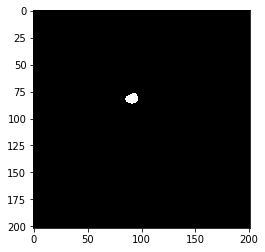

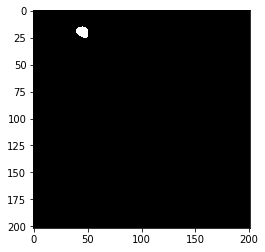

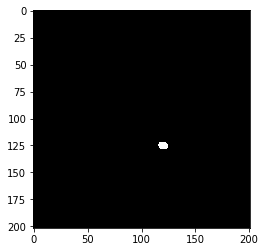

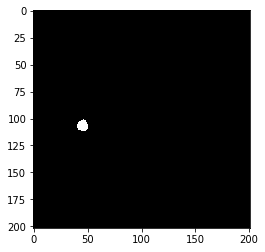

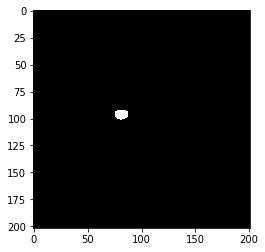

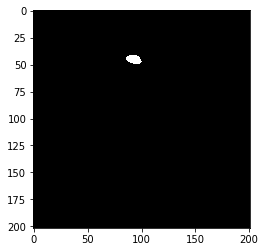

In [8]:
#shape (202, 201, 16)

ind_mean_roi = mat_list[1]
ind_mean_roi = np.asarray(ind_mean_roi)

for i in range(ind_mean_roi.shape[2]):
    plt.imshow(ind_mean_roi[:,:,i], cmap = 'gray')
    plt.show()

# Grey ROI per Frames

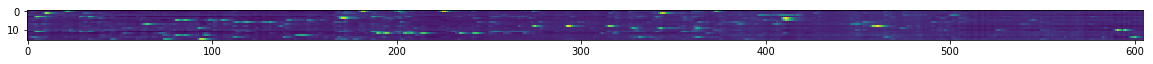

In [10]:
t3 = mat_list[2]
t3 = np.asarray(t3)
t3 = t3.transpose()

plt.figure(figsize=(20,50))
plt.imshow(t3)
#plt.savefig('grey_ROI.eps', format='eps', dpi=300)

In [24]:
ex_list = []
fps = 5

for i in range(int(t3.shape[1]/5)):
    start = i*fps
    end = start + fps
    #print(start, end)
    sums = np.sum(t3[0,start:end])
    mean = sums/fps
    ex_list.append(mean)

0 5
5 10
10 15
15 20
20 25
25 30
30 35
35 40
40 45
45 50
50 55
55 60
60 65
65 70
70 75
75 80
80 85
85 90
90 95
95 100
100 105
105 110
110 115
115 120
120 125
125 130
130 135
135 140
140 145
145 150
150 155
155 160
160 165
165 170
170 175
175 180
180 185
185 190
190 195
195 200
200 205
205 210
210 215
215 220
220 225
225 230
230 235
235 240
240 245
245 250
250 255
255 260
260 265
265 270
270 275
275 280
280 285
285 290
290 295
295 300
300 305
305 310
310 315
315 320
320 325
325 330
330 335
335 340
340 345
345 350
350 355
355 360
360 365
365 370
370 375
375 380
380 385
385 390
390 395
395 400
400 405
405 410
410 415
415 420
420 425
425 430
430 435
435 440
440 445
445 450
450 455
455 460
460 465
465 470
470 475
475 480
480 485
485 490
490 495
495 500
500 505
505 510
510 515
515 520
520 525
525 530
530 535
535 540
540 545
545 550
550 555
555 560
560 565
565 570
570 575
575 580
580 585
585 590
590 595
595 600
600 605


In [25]:
ex_list = np.asarray(ex_list)
ex_list.shape

(121,)

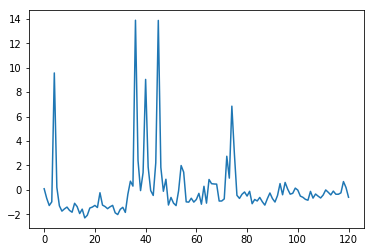

In [26]:
plt.plot(ex_list)

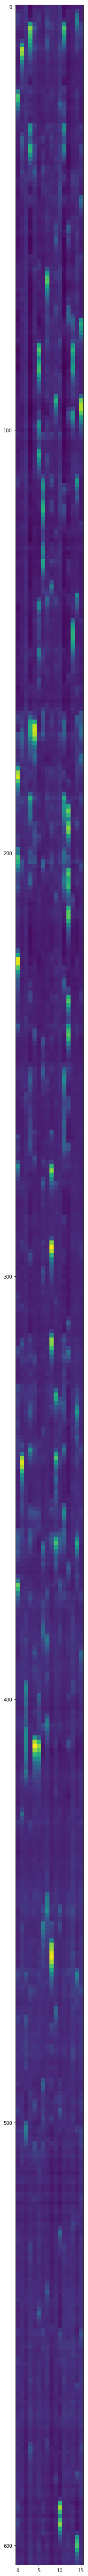

In [11]:
#shape (605, 16) framesize x #ROI
t4 = mat_list[2]
t4 = np.asarray(t4)

plt.figure(figsize=(50,100))
plt.imshow(t4)
plt.show()

In [13]:
#returing index of the ROI with maximum value w.r.t Frames
index_list = []
for i in range(len(t4)):
    index_list.append(np.argmax(t4[i]))
    
np.asarray(index_list)

array([10, 14, 14, 14,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  0,  0,  0,  0,  0, 11, 11, 11,  3,  3,  3,  1,  3,  3,
        3,  3,  3,  3,  4,  4,  4, 10, 10, 10, 10, 15, 15, 15, 15, 10,  7,
        9, 12, 12,  9,  9,  9,  9,  9, 15, 14, 14,  7,  7,  7,  7,  7,  7,
        7,  7,  7, 12, 12, 12, 15, 15, 15, 15, 15, 13,  5,  5,  5, 13,  5,
        5,  5,  5,  5,  5,  5,  5,  9, 15, 15, 15, 15, 15,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5, 14, 14,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        8,  8,  8, 14, 14,  5,  5,  5,  5, 13, 13, 13, 13, 13, 13, 13, 13,
        5,  5,  5,  5, 13,  5,  5,  5, 14, 14,  2,  2,  7,  6,  6,  3,  4,
        4,  4,  4,  4,  4,  4,  4,  4, 15, 15,  0,  0,  0,  0,  0,  0, 11,
        3, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  0,  0,  0,  0,  0,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12,  0,  0,  0

In [17]:
t4[0]

array([-1.65095257, -0.91173168,  0.16389373, -2.67115289, -0.96457788,
       -1.20562442, -0.84997039, -0.08884927, -0.34957776, -0.6455399 ,
        0.42167751, -2.569551  , -1.80109753, -1.34806956, -1.24058042,
       -1.36132097])

In [23]:
#returing index of the ROI with value > 0
index_list02 = []
for i in range(len(t4)):
    index_list02.append(np.where(t4[i]>0))

index_list02 

[(array([ 2, 10]),),
 (array([ 2,  7, 10, 14]),),
 (array([ 0,  2,  5,  7, 10, 14]),),
 (array([ 0,  2,  5,  7, 10, 14]),),
 (array([ 0,  2,  3,  4,  7,  8, 10, 11, 14, 15]),),
 (array([ 2,  3,  4,  7,  8, 10, 11, 14, 15]),),
 (array([ 2,  3,  4,  7, 10, 11, 14, 15]),),
 (array([ 2,  3,  4,  7, 10, 11, 14, 15]),),
 (array([ 1,  3,  4,  7, 10, 11, 14, 15]),),
 (array([ 1,  2,  3,  4,  5,  7,  8, 10, 11, 14, 15]),),
 (array([ 1,  2,  3,  4,  7, 10, 11, 14]),),
 (array([ 1,  2,  3,  4,  7, 10, 11]),),
 (array([ 1,  2,  3,  4,  7, 10, 11]),),
 (array([ 1,  3, 10]),),
 (array([ 1,  3, 10]),),
 (array([ 1,  2,  3, 10]),),
 (array([1, 2]),),
 (array([ 1,  2, 10]),),
 (array([ 1,  2, 10]),),
 (array([ 0,  1,  2, 10, 11]),),
 (array([ 0,  1,  2,  3,  8, 10, 11, 14]),),
 (array([ 0,  8, 10, 14]),),
 (array([ 0,  2, 10, 11]),),
 (array([ 0,  2, 10, 11]),),
 (array([ 0,  2, 10, 11]),),
 (array([ 0,  2, 10, 11]),),
 (array([ 0,  2, 10, 11]),),
 (array([10, 11]),),
 (array([ 3,  4,  7,  8, 10, 11, 1

In [19]:
t4[604]

array([-0.19862697, -0.52678151, -1.49500809,  0.3448187 , -0.69180846,
        0.12519197, -0.61212902, -0.4061009 , -1.68004665, -1.09210501,
       -1.22366929,  0.05929373, -0.06632815, -0.47864306,  1.32893099,
        0.19849906])

In [24]:
print(np.min(t4))
print(np.max(t4))

-3.2658793105418127
21.069869148079988
